# Lab Assignment 2
Name: **Rafiqul Islam** ; 
student id : **12123971**

### Task -1 Dimensionality Reduction, Principal Component Analysis
## a)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import sklearn

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from numpy.linalg import svd 

In [2]:
#read data form csv file using pandas
df = pd.read_csv (r'seeds.csv')
x = df.copy()
# list of column names
y = df.columns.values.tolist()
x.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [3]:
# scaling data by using standard scaler
std_scaler = StandardScaler()
x_scaled = std_scaler.fit_transform(x)
x_scaled

array([[ 0.11716431,  0.18679667,  0.0081443 , ..., -1.00737062,
        -0.40826475, -1.22634124],
       [-0.01330197, -0.01975993,  0.44234139, ..., -1.82718718,
        -0.9454197 , -1.22634124],
       [-0.21586804, -0.38697165,  1.46979786, ..., -0.68162472,
        -1.21196249, -1.22634124],
       ...,
       [-0.59010028, -0.71593216,  0.75186803, ...,  3.14554887,
        -0.74195192,  1.23872853],
       [-1.05703224, -1.06019315, -0.80436312, ..., -0.06897709,
        -0.76636805,  1.23872853],
       [-0.89909937, -0.96073998, -0.10362921, ...,  1.32055406,
        -0.72770917,  1.23872853]])

In [4]:
#SVD part start-----------------------------------------------------------

U, S, V = svd(x_scaled, full_matrices=False)
  
print("matrix U = ")
print(U.shape)
print("matrix S = ")
print(S.shape)
print("matrix V = ")
print(V.shape)

var_explained_svd = np.round(S**2/np.sum(S**2), decimals=3)
var_explained_svd

matrix U = 
(199, 8)
matrix S = 
(8,)
matrix V = 
(8, 8)


array([0.648, 0.214, 0.085, 0.045, 0.006, 0.002, 0.001, 0.   ])

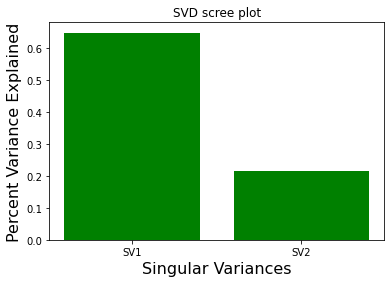

In [5]:

# svd_labels = ['SV' + str(x) for x in range(1, len(var_explained_svd)+1)]
# plt.bar(x=list(range(1,len(var_explained_svd)+1)), 
#         height=var_explained_svd,
#         tick_label = svd_labels, 
#         color="green")

svd_labels = ['SV' + str(x) for x in range(1, 3)]
plt.bar(x=list(range(1,3)), 
        height=var_explained_svd[0:2],
        tick_label = svd_labels, 
        color="green")

plt.xlabel('Singular Variances', fontsize=16)
plt.ylabel('Percent Variance Explained', fontsize=16)
plt.title('SVD scree plot')
plt.show()
#SVD part end-----------------------------------------------------------

In [6]:
#PCA part start-----------------------------------------------------------

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)
# pca.explained_variance_ratio_
# pca.explained_variance_ratio_.sum()
var_explained_pca = np.round(pca.explained_variance_ratio_, 
                             decimals=3)
var_explained_pca

array([0.648, 0.214])

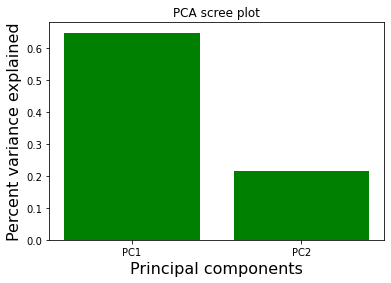

In [7]:

pca_labels = ['PC' + str(x) for x in range(1, len(var_explained_pca)+1)]
plt.bar(x=range(1, len(var_explained_pca)+1), 
        height=var_explained_pca, 
        tick_label = pca_labels, 
        color="green")
plt.ylabel('Percent variance explained', fontsize=16)
plt.xlabel('Principal components', fontsize=16)
plt.title('PCA scree plot')
plt.show()
#PCA part end-----------------------------------------------------------

## b)

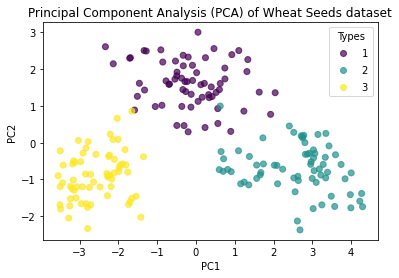

In [8]:
types = df.Type
points = plt.scatter(x_pca[:,0], 
                     x_pca[:,1], 
                     c = types, 
                     alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Principal Component Analysis (PCA) of Wheat Seeds dataset")
plt.legend(*points.legend_elements(), title="Types")
plt.show()


## c)

### The importance of PCA in the “curse of dimensionality” problem:
'curse of dimensionality' is a major problem in data mining in large data sets with many potential predictor variables. This expression describe the increasing difficulty in training a model when more predictor variables are added to it. In other words, the error increases with the increase in the number of features. Furthermore, because of high dimentation the algorithms are harder to design.

Principal component analysis (PCA) can solve this problem. PCA is a technique for reducing the large dimensionality of datasets to a smaller one that still contain the most important information from the large set. So without lossing much information we get the lower dimensional data, lower dimensional data is make the computations easy and faster.

### Task -2 Clustering
## a)

In [9]:
import pandas as pd
import numpy as np

from sklearn import mixture
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
#read data form csv file using pandas
df1 = pd.read_csv (r'dataset1_noCluster7.csv')

#scaling data
scaler = MinMaxScaler()
df1['Y'] = scaler.fit_transform(df1[["Y"]])
df1['X'] = scaler.fit_transform(df1[["X"]])
df1.head()

,X,Y,label
0,0.367470,0.981618,2
1,0.347892,0.941176,2
2,0.334337,0.970588,2
3,0.325301,0.987132,2
4,0.313253,0.959559,2


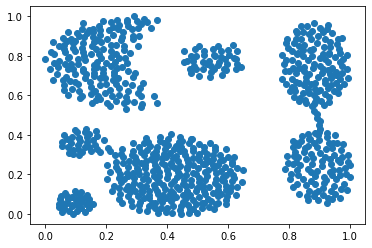

In [11]:
#plot data in scatter plot
plt.scatter(df1['X'], df1['Y'])
plt.show()

In [12]:
df2 = pd.read_csv (r'dataset2_noCluster6.csv')
#scaling data
scaler = MinMaxScaler()
df2['Y'] = scaler.fit_transform(df2[["Y"]])
df2['X'] = scaler.fit_transform(df2[["X"]])
df2.head()

,X,Y,label
0,0.548252,0.964706,1
1,0.633566,0.964706,1
2,0.682517,0.902941,1
3,0.574825,0.888235,1
4,0.636364,0.835294,1


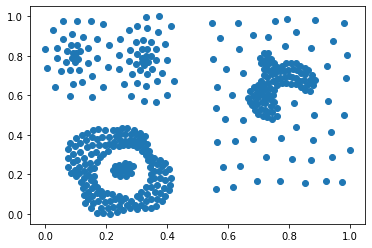

In [13]:
#plot data in scatter plot
plt.scatter(df2['X'], df2['Y'])
plt.show()

In [14]:
df3 = pd.read_csv (r'dataset3_noCluster2.csv')
scaler = MinMaxScaler()
df3['Y'] = scaler.fit_transform(df3[["Y"]])
df3['X'] = scaler.fit_transform(df3[["X"]])
df3.head()

,X,Y,C
0,0.462567,0.827002,1
1,0.417728,0.287905,2
2,0.372799,0.368506,2
3,0.171456,0.795269,1
4,0.943495,0.267225,2


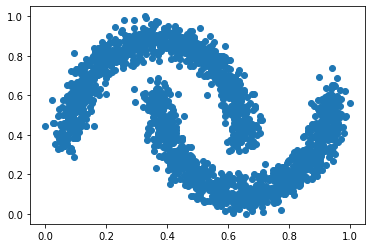

In [15]:
#plot data in scatter plot
plt.scatter(df3['X'], df3['Y'])
plt.show()

In [16]:
df4 = pd.read_csv (r'dataset4_noCluster2.csv')
scaler = MinMaxScaler()
df4['Y'] = scaler.fit_transform(df4[["Y"]])
df4['X'] = scaler.fit_transform(df4[["X"]])
df4.head()

,X,Y,C
0,0.787066,0.443775,1
1,0.747541,0.356564,1
2,0.618671,0.356595,1
3,0.893269,0.350083,1
4,0.747625,0.670901,1


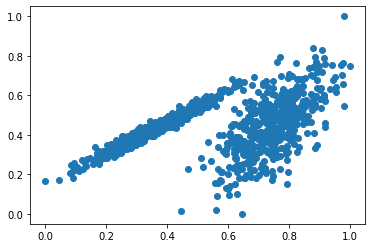

In [17]:
#plot in scatter plot
plt.scatter(df4['X'], df4['Y'])
plt.show()

## b)

In [18]:
#plot function------------------------------------------------------
def plot_data(df, n_clusters, title):
#     noise = df.cluster
#     print(noise[0])
#     if df.cluster.contains(-1):
#         plt.scatter(c_dic['c'+str(index)].X, 
#                     c_dic['c'+str(index)].Y,
#                     alpha=0.7)
    #declare a dictionary to dynamically keeps different clusters data
    c_dic = {}
    for index in range(n_clusters):
        #update dictionary with different cluster's data
        #sample dictionary data shape
        #c_dic = {'c1': data, 'c2': data, ....} 
        c_dic['c'+str(index)] = df[df.cluster==index]
        #plot different cluster's data
        plt.scatter(c_dic['c'+str(index)].X, 
                    c_dic['c'+str(index)].Y,
                    alpha=0.7,
                    label='c'+str(index))
        #plot different cluster's centers
#         plt.scatter(
#             km.cluster_centers_[:,0],
#             km.cluster_centers_[:,1],
#             color='r',
#             marker='+',
#             s=100,
#             label='centroid')
#     plt.legend()
    plt.xlabel('X',fontsize=14)
    plt.ylabel('Y',fontsize=14)
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
    plt.show()

    
#calculate score for cluster function---------------------------------
def getScore(df, y_pred):
    true_labels = []
    if 'label' in df.columns:
        true_labels = df['label']
    else:
        true_labels = df['C']
    
    #get silhouette score
    sltt_score = silhouette_score(df[['X','Y']],
                                  y_pred).round(2)
    #get adjusted rand score
    adjst_score = adjusted_rand_score(true_labels, 
                                      y_pred)
#     print("Silhouette score------------>{}".format(sltt_score))
#     print("Adjusted rand score--------->{}".format(adjst_score))
    return [sltt_score, adjst_score]

    
#k-means function-----------------------------------------------------
def k_means(n_clusters, df):
    #apply k-means form sklearn.cluster
    km = KMeans(n_clusters=n_clusters)
    y_pred = km.fit_predict(df[['X','Y']])
    #add new column as 'cluster' in data frame with predieted cluster values 
    df['cluster']=y_pred
    # print(km.cluster_centers_)
    
    #get silhouette and adjusted score
    score_list = getScore(df, y_pred)
    score_list.append('k-means')
    #Elbow Plot to visuallize the errors for different k, and select best k value from plot
    sse = []
    k_rng = range(1,10)
    for k in k_rng:
        km1 = KMeans(n_clusters=k)
        km1.fit(df1[['X','Y']])
        sse.append(km1.inertia_)

    plt.xlabel('K')
    plt.ylabel('Sum of squared error')
    plt.title('Elbow Plot, select best k value from plot')
    plt.plot(k_rng,sse)
    plt.show()
    
    #call custom plot function to plot clustered data
    plot_data(df, len(set(y_pred)), 'K-means Clustering')
    
    return score_list

    
#DBSCAN function------------------------------------------------------------------------
def db_scan(eps, min_samples, df):
    #apply DBSCAN form sklearn.cluster
    dbscan = DBSCAN(eps=eps, 
                    min_samples=min_samples, 
                    n_jobs=-1)
    y_pred = dbscan.fit_predict(df[['X','Y']])
    #add new column as 'cluster' in data frame with predieted cluster values 
    df['cluster']=y_pred
#     print(len(set(y_pred)))
    
    #get silhouette and adjusted score
    score_list = getScore(df, y_pred)
    score_list.append('DBSCAN')

    #finding best epsilon value for dbscan algorithm
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs = neigh.fit(df[['X','Y']])
    distances, indices = nbrs.kneighbors(df[['X','Y']])
    
    # Plotting K-distance Graph
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
#     plt.figure(figsize=(20,10))
    plt.plot(distances)
    plt.title('K-distance Graph')
    plt.xlabel('Data Points sorted by distance',fontsize=14)
    plt.ylabel('Epsilon',fontsize=14)
    plt.show()
    
    #call custom plot function to plot clustered data
    plot_data(df, len(set(y_pred)), 'DBSCAN Clustering')
    
    return score_list
    

#Expectation maximizatin with gussian---------------------------------
def expectation_maximization(n_components=3, covariance_type='tied', max_iter=100, init_params='random', df=df1):
    #apply k-means form sklearn.cluster
    gmm = mixture.BayesianGaussianMixture(
        n_components=n_components,
        covariance_type=covariance_type,
        max_iter=max_iter,
        init_params=init_params)
    y_pred = gmm.fit_predict(df[['X','Y']])
    #add new column as 'cluster' in data frame with predieted cluster values 
    df['cluster']=y_pred
    # print(km.cluster_centers_)
    
    #get silhouette and adjusted score
    score_list = getScore(df, y_pred)
    score_list.append('Expectation maximization')
    
    #call custom plot function to plot clustered data
    plot_data(df, len(set(y_pred)), 'Expectation maximization Clustering')
    
    return score_list
    
    
#Average Link function-----------------------------
def average_link(n_clusters,linkage, df):
    #apply Agglomerative clustering form sklearn.cluster
    #linkage="average"/"ward"/"complete"/"single"
    ac = AgglomerativeClustering(n_clusters=n_clusters, 
                                 linkage=linkage)
    y_pred = ac.fit_predict(df[['X','Y']])
    #add new column as 'cluster' in data frame with predieted cluster values 
    df['cluster']=y_pred
    # print(km.cluster_centers_)
   
    #get silhouette and adjusted score
    score_list = getScore(df, y_pred)
    score_list.append('Average link')
    
    #call custom plot function to plot clustered data
    plot_data(df, len(set(y_pred)), 'Average link Clustering')
    
    return score_list

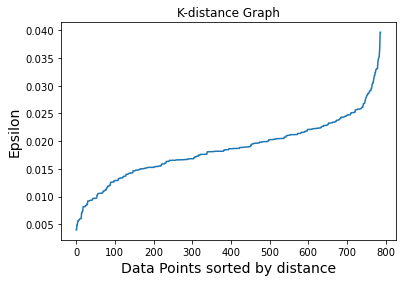

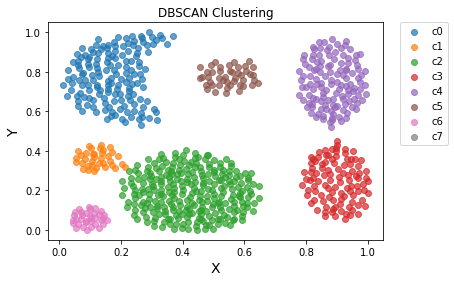

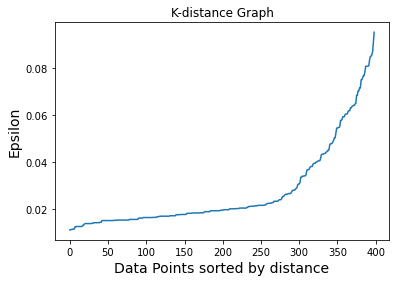

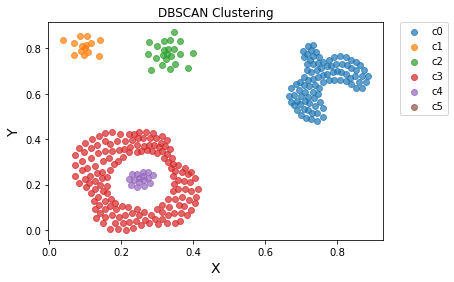

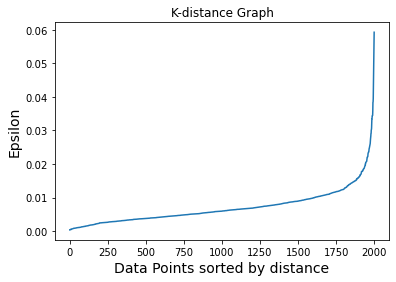

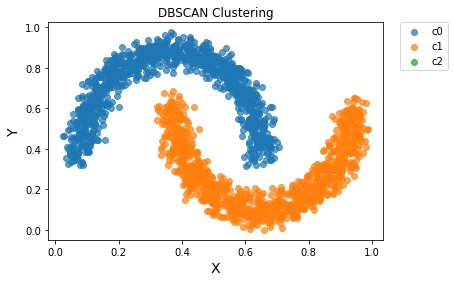

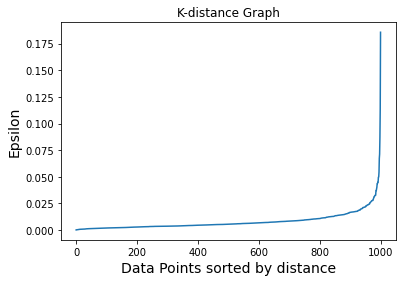

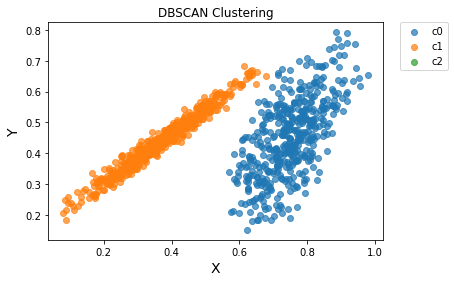

[0.49, 0.9064308192490694, 'DBSCAN']

In [19]:
# xy = [[2,3],[1,3,],[2,2],[1,2],[3,6],[3,11],[2,10],[2,11],[3,9],[4,10],[7,9],[10,10],[9,1],[8,3],[9,2],[10,3],[8,2],[9,4],[10,4],[10,5]]
# test_df = pd.DataFrame(xy,columns=['X','Y'])
# db_scan(1.1, 3, test_df)
# db_scan(2.1, 4, test_df)
# db_scan(2.1, 5, test_df)
# db_scan(4.1, 4, test_df)
# db_scan(4.1, 5, test_df)
db_scan(0.036, 5, df1)
db_scan(0.04, 5, df2)
db_scan(0.03, 5, df3)
db_scan(0.035, 5, df4)

#### Used cluster: DBSCAN
Some of the given datasets contain non-linear shapes and some of them contain noise data points. To cluster them, I tried different cluster algorithms like DBSCAN, KMeans, Expectation-Maximization (EM), and Average Link. From them, DBSCAN performed better.

#### Parameters chosen: 
I used three parameters. They are:
*eps*, *min_samples*, *n_jobs*.

#### Reasons to choose these parameters:
*eps*: The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is the most important DBSCAN parameter that needs to be properly selected for datasets and distance functions.
DBSCAN will cluster the same dataset differently depending on this parameter. To select the best value for this parameter I plot the K-distance graph using the **NearestNeighbors** library. From this graph, we can see when data density is increasing. All we have to do to pick the best value for epsilon is to pick an epsilon value from where the epsilon is increasing instantly. In our case for the first dataset, epsilon = 0.036.

*min_samples*: The number of samples in a neighborhood for a point to be considered as a core point. This includes the point itself. It is also important for DBSCAN clustering. Generally, MinPts should be greater than or equal to the dimensionality of the dataset. Our data set is two-dimensional. So, I have tested with 2 and greater values. At last, I found using 5 gives the best clustering result.

*n_jobs*: To execute program faster in parallel. The value -1 means system will use all available processor to execute the program parallelly.


## c)

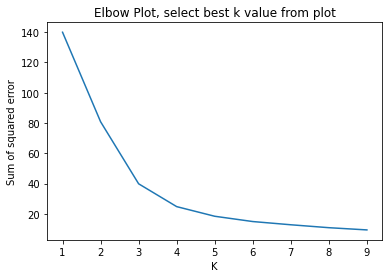

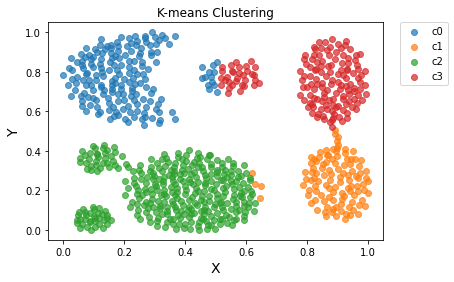

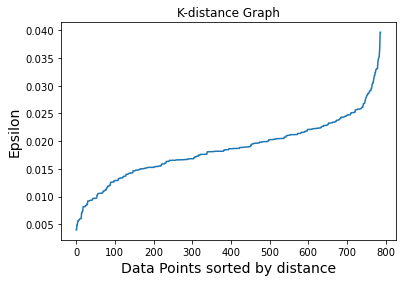

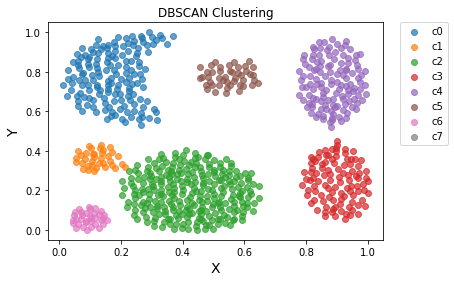

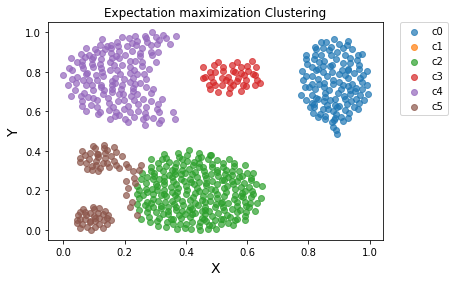

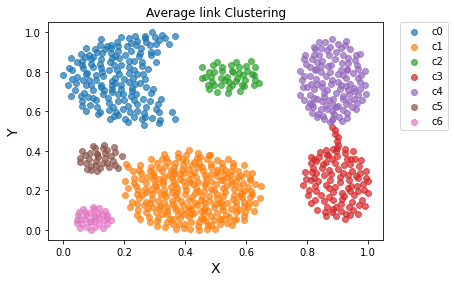

In [20]:
#using sklearn.metrics compare all the algorithm results
#for dataset 1-------------------------------------

#k-means
km_score_df1 = k_means(4, df1)

#DBSCAN
dbscan_score_df1 = db_scan(0.036, 5, df1)

#expectation maximization
em_score_df1 = expectation_maximization(n_components=7, 
                                  covariance_type='diag', 
                                  max_iter=100, 
                                  init_params='kmeans', 
                                  df=df1)

#average link
al_score_df1 = average_link(7,"average",df1)

In [21]:
#dataset-1 scores
score_list_df1 = [km_score_df1, dbscan_score_df1, em_score_df1, al_score_df1]
# Create the pandas DataFrame
scores_df1 = pd.DataFrame(score_list_df1, columns = ['Silhouette score', 'Adjusted rand score', 'Algorithm'])
scores_df1

,Silhouette score,Adjusted rand score,Algorithm
0,0.54,0.762285,k-means
1,0.46,0.966100,DBSCAN
2,0.49,0.945888,Expectation maximization
3,0.47,0.991327,Average link


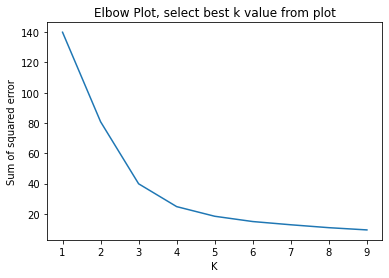

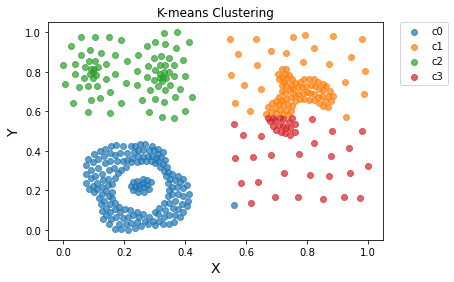

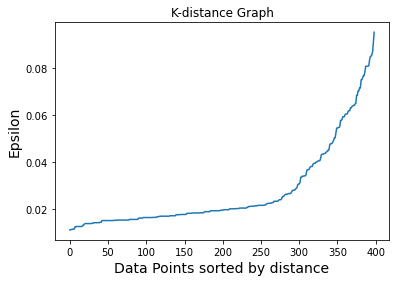

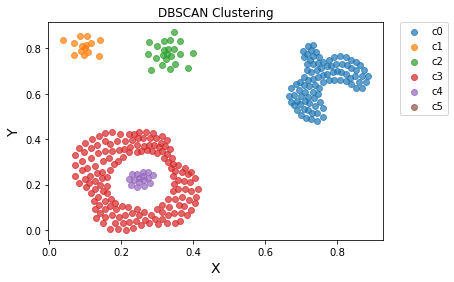

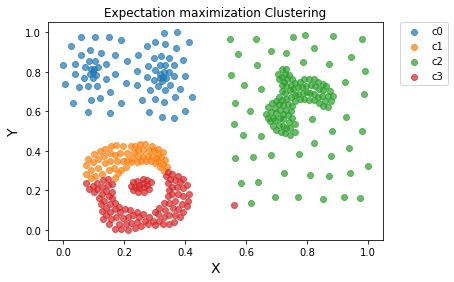

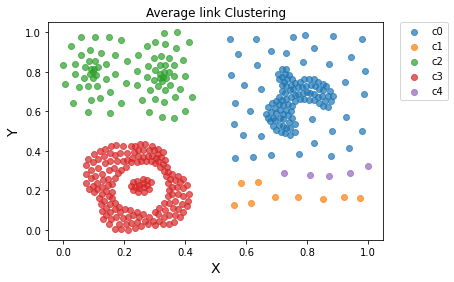

In [22]:
#Dataset 2-------------------------------------
#k-means
km_score_df2 = k_means(4, df2)

#DBSCAN
dbscan_score_df2 = db_scan(0.04, 5, df2)

#Expectation maximization
em_score_df2 = expectation_maximization(n_components=4, 
                                        covariance_type='diag', 
                                        max_iter=100, 
                                        init_params='kmeans', 
                                        df=df2)

#average link
al_score_df2 = average_link(5,"single",df2)

In [23]:
#dataset-2 scores
score_list_df2 = [km_score_df2, dbscan_score_df2, em_score_df2, al_score_df2]
# Create the pandas DataFrame
scores_df2 = pd.DataFrame(score_list_df2, columns = ['Silhouette score', 'Adjusted rand score', 'Algorithm'])
scores_df2

,Silhouette score,Adjusted rand score,Algorithm
0,0.54,0.729404,k-means
1,0.03,0.877617,DBSCAN
2,0.47,0.543527,Expectation maximization
3,0.53,0.755249,Average link


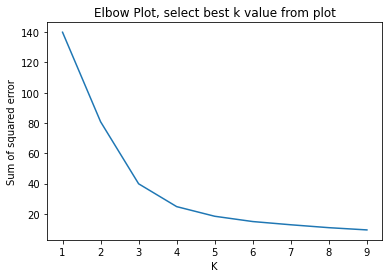

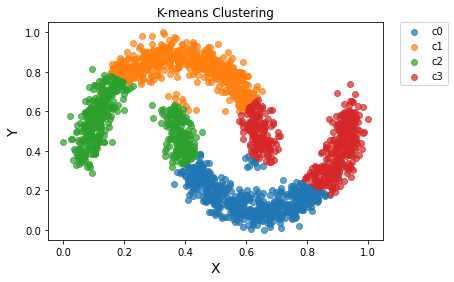

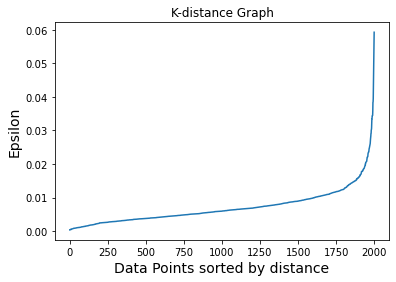

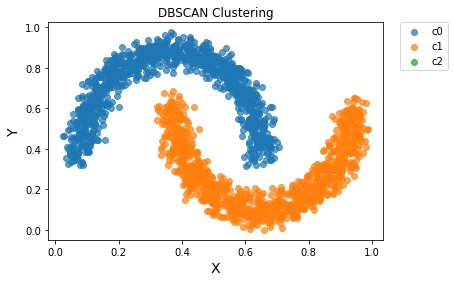

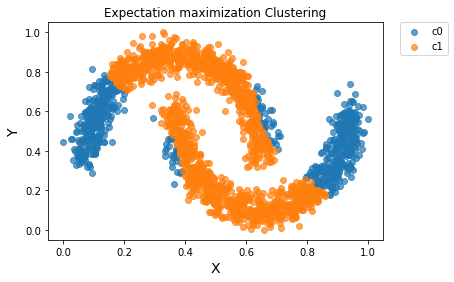

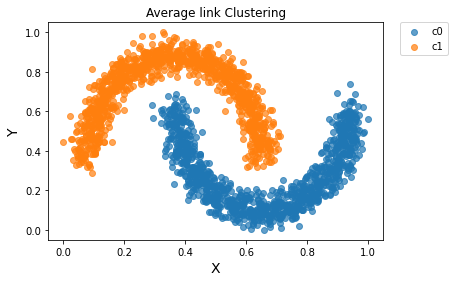

In [24]:
#Dataset 3-------------------------------------
#k-means
km_score_df3 = k_means(4, df3)

#DBSCAN
dbscan_score_df3 = db_scan(0.03, 5, df3)

#Expactation maximization
em_score_df3 = expectation_maximization(n_components=2, 
                                        covariance_type='full', 
                                        max_iter=100, 
                                        init_params='random', 
                                        df=df3)

#Average link
al_score_df3 = average_link(2,"single",df3)

In [25]:
#dataset-3 scores
score_list_df3 = [km_score_df3, dbscan_score_df3, em_score_df3, al_score_df3]
# Create the pandas DataFrame
scores_df3 = pd.DataFrame(score_list_df3, columns = ['Silhouette score', 'Adjusted rand score', 'Algorithm'])
scores_df3

,Silhouette score,Adjusted rand score,Algorithm
0,0.43,0.294111,k-means
1,0.29,0.975180,DBSCAN
2,0.12,-0.000026,Expectation maximization
3,0.39,1.000000,Average link


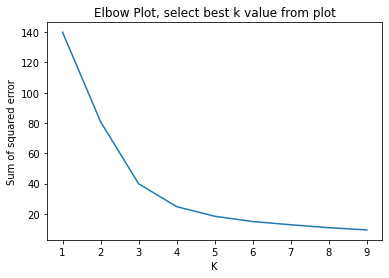

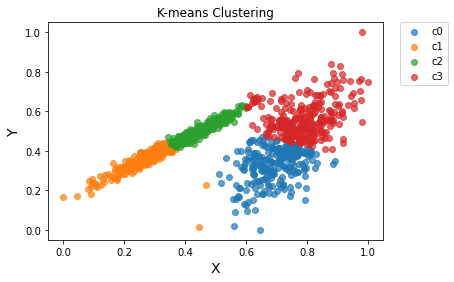

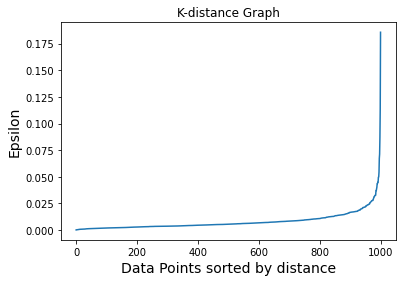

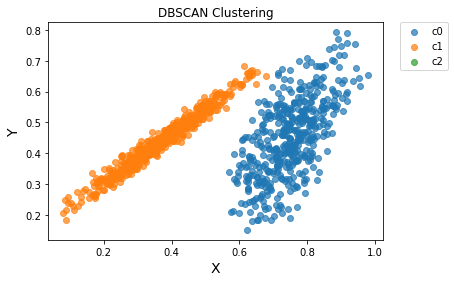

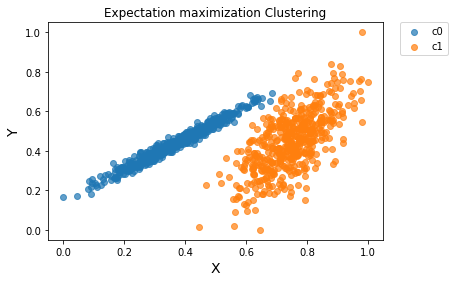

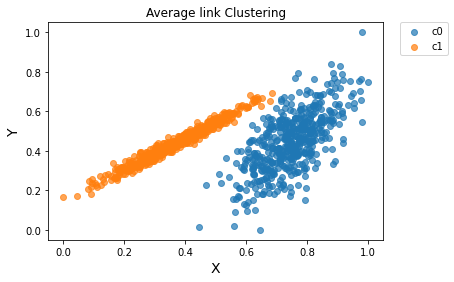

In [26]:
#dataset 4-------------------------------------
#k-means
km_score_df4 = k_means(4, df4)

#DBSCAN
dbscan_score_df4 = db_scan(0.035, 5, df4)

#Expactation maximization
em_score_df4 = expectation_maximization(n_components=2, 
                                  covariance_type='full', 
                                  max_iter=100, 
                                  init_params='random', 
                                  df=df4)

#Average link
al_score_df4 = average_link(2,"ward",df4)

In [27]:
#dataset-4 scores
score_list_df4 = [km_score_df4, dbscan_score_df4, em_score_df4, al_score_df4]
# Create the pandas DataFrame
scores_df4 = pd.DataFrame(score_list_df4, columns = ['Silhouette score', 'Adjusted rand score', 'Algorithm'])
scores_df4

,Silhouette score,Adjusted rand score,Algorithm
0,0.47,0.461982,k-means
1,0.49,0.906431,DBSCAN
2,0.53,0.984048,Expectation maximization
3,0.53,0.984048,Average link


## d)

### Results discussion:
k-means, DBSCAN, Expectation maximization, and Average link algorithms were applied in all the four given data sets. After that, for evolution, the Sillhouette score and adjusted rand score had been calculated.

With the silhouette coefficient, it is hard to identify which clustering algorithm performs better because we can see from graphs that some cluster algorithms silhouette coefficient is high but another algorithm appears to find more natural clusters according to the shape of the data. This suggests that we need a better method to compare the performance of these clustering algorithms. Since the ground truth labels are known, it’s possible to use a clustering metric that considers labels in its evaluation. The Adjusted rand index (ARI) had been used. Unlike the silhouette coefficient, the ARI uses true cluster assignments to measure the similarity between true and predicted labels. 

The ARI output values range between -1 and 1. A score close to 0.0 indicates random assignments, and a score close to 1 indicates perfectly labeled clusters.

**Dataset-1:**
For dataset-1 we can see from the scores table the silhouette score of k-means is largest but DBSCAN and average link cluster algorithm gives more natural clusters. If we see the Adjusted rand score for the dataset-1 average link is more accurate than others. It's Adjusted rand score of 0.9912 which is almost the same as the true labels. DBSCAN is also performed well in this case.

**Dataset-2:**
Dataset-2 contains many noise points. DBSCAN clustering algorithm performs better with noisy data. We can see the adjusted rand score of DBSCAN is the largest which is 0.8776.

**Dataset-3:**
For Dataset-3, the performance of k-means and Expectation maximization is really bad but on the other hand, the Average link is perfect. Its Adjusted rand score is 1 which means our predicted labels and true labels are exactly the same. Anyways DBSCAN also performed well. DBSCAN score is 0.9751.

**Dataset-4:**
In Dataset-4 the Adjusted rand score of Expectation maximization and Average link is the same and the highest(0.9840). DBSCAN's performance is also good but here k-means's score is low. K-means couldn't cluster the dataset properly.

Overall in average DBSCAN performs really well for these 4 datasets. Sometimes it didn't give exact cluster but most of the time it give more natural cluster than others.


### Task -3 Apriori Algorithm for Recommender Systems
## a)

In [28]:
import numpy as np
from collections import Counter
import json

from itertools import combinations
from collections import OrderedDict
# import sys

# from itertools import chain, combinations
# from collections import defaultdict
# from optparse import OptionParser

# from apyori import apriori

In [29]:
movie_list = []
movie_list_unique = []
#read data from text file
with open("movies.txt", "r") as m_id:
    for row in m_id:
        str_line = row.strip().split(';')
        movie_list.append(str_line)
        #separate unique movies
        for single_movie in str_line:
            if(single_movie not in movie_list_unique):
                movie_list_unique.append(single_movie)

#first 5 row from dataset
# for i in range(5):
#     print(movie_list[i])

print(len(movie_list))
movie_list

8892


[['Incredibles 2',
  'Avengers: Infinity War - Part I',
  'Avengers: Infinity War - Part II',
  'Deadpool 2'],
 ['Annihilation',
  'John Wick: Chapter 3 â€“ Parabellum',
  'Deadpool 2',
  'Incredibles 2',
  'Avengers: Infinity War - Part I',
  'Avengers: Infinity War - Part II',
  'Mission: Impossible - Fallout',
  'Spider-Man: Into the Spider-Verse'],
 ['Avengers: Infinity War - Part I', 'Bohemian Rhapsody'],
 ['Green Book', 'Incredibles 2', 'Isle of Dogs'],
 ['Bohemian Rhapsody',
  'Captain Marvel',
  'Avengers: Infinity War - Part I',
  'Spider-Man: Into the Spider-Verse'],
 ['Deadpool 2',
  'Incredibles 2',
  'Avengers: Infinity War - Part I',
  'Avengers: Infinity War - Part II',
  'Captain Marvel',
  'Solo: A Star Wars Story',
  'Spider-Man: Into the Spider-Verse'],
 ['Green Book', 'Venom', 'Spider-Man: Into the Spider-Verse', 'Deadpool 2'],
 ['Annihilation',
  'Roma',
  'Joker',
  'Deadpool 2',
  'Hereditary',
  'Avengers: Infinity War - Part I',
  'The Ballad of Buster Scruggs'

In [30]:
print(len(movie_list_unique))
movie_list_unique

50


['Incredibles 2',
 'Avengers: Infinity War - Part I',
 'Avengers: Infinity War - Part II',
 'Deadpool 2',
 'Annihilation',
 'John Wick: Chapter 3 â€“ Parabellum',
 'Mission: Impossible - Fallout',
 'Spider-Man: Into the Spider-Verse',
 'Bohemian Rhapsody',
 'Green Book',
 'Isle of Dogs',
 'Captain Marvel',
 'Solo: A Star Wars Story',
 'Venom',
 'Roma',
 'Joker',
 'Hereditary',
 'The Ballad of Buster Scruggs',
 'Sorry to Bother You',
 'Game Night',
 'Searching',
 'Upgrade',
 'Us',
 'Fantastic Beasts and Where to Find Them 2',
 'A Quiet Place',
 'Once Upon a Time in Hollywood',
 'Black Mirror: Bandersnatch',
 'Spider-Man: Far from Home',
 'Aquaman',
 'Jurassic World: Fallen Kingdom',
 'Ant-Man and the Wasp',
 'Free Solo',
 'Crazy Rich Asians',
 'BlacKkKlansman',
 'Ralph Breaks the Internet',
 'Eighth Grade',
 'Glass',
 'A Star Is Born',
 'Bird Box',
 'Love, Simon',
 'First Man',
 'Bad Times at the El Royale',
 'Shazam!',
 'Alita: Battle Angel',
 "Won't You Be My Neighbor?",
 'Red Sparrow

In [31]:
#function needs to apriori algorithm
# minimum_support = 0.05
# minimum_support = 444
# backet_list = [['a','b'],['a','c'],['c','d'],['a','d']]
# backet_list_unique = np.unique(backet_list)

# com_list = []
# for i in range(1,len(backet_list_unique)+1):
#     s_item = list(combinations(backet_list_unique,i))
#     com_list.extend(s_item)
# com_list

In [32]:
#function needs to apriori algorithm
# minimum_support = 0.05
minimum_support = 444
# This function takes dic and minimum support as parameters and 
# eliminate a movie which has lower frequency than minimum support
def eliminate_minsup(dic, minsup):
    words = dic.keys()
    for word in list(words):
        if dic[word] < minsup:
            del dic[word]
    return dic

# counting the movies in the initial state
def count_first_freq(inputs, minsup):
    dic = dict()
    for line in inputs:
        for word in line:
            if word not in dic.keys():
                dic[word] = 1
            else:
                dic[word] += 1
    return eliminate_minsup(dic, minsup)

# Sort dictionary by frequency
def sorting(dic):
    new_dic = dict()
    alpha_sort = sorted(list(dic.keys()))
    num_sort = sorted(alpha_sort, key=dic.get, reverse=True)
    for i in num_sort:
        new_dic[i] = dic[i]
    return new_dic


single_movie_supports = count_first_freq(movie_list, minimum_support)
print(len(single_movie_supports))
#sorting
single_movie_supports = sorting(single_movie_supports)   
print(single_movie_supports)

# save data into text file
f = open("oneItems.txt", "w")
for key, value in single_movie_supports.items(): 
        f.write('%s:%s\n' % (value, key))
f.close()

50
{'Avengers: Infinity War - Part I': 5294, 'Deadpool 2': 4003, 'Spider-Man: Into the Spider-Verse': 2976, 'Avengers: Infinity War - Part II': 2771, 'Incredibles 2': 2729, 'A Quiet Place': 2202, 'Bohemian Rhapsody': 2052, 'Annihilation': 1916, 'Isle of Dogs': 1898, 'Ant-Man and the Wasp': 1826, 'Green Book': 1812, 'Mission: Impossible - Fallout': 1525, 'Solo: A Star Wars Story': 1465, 'Game Night': 1317, 'Hereditary': 1278, 'Captain Marvel': 1263, 'BlacKkKlansman': 1215, 'Spider-Man: Far from Home': 1130, 'Venom': 1093, 'Upgrade': 1025, 'A Star Is Born': 1013, 'Aquaman': 943, 'The Ballad of Buster Scruggs': 920, 'Jurassic World: Fallen Kingdom': 887, 'Fantastic Beasts and Where to Find Them 2': 874, 'Bird Box': 873, 'Once Upon a Time in Hollywood': 859, "Ocean's 8": 850, 'Searching': 812, 'Roma': 801, 'Joker': 792, 'Black Mirror: Bandersnatch': 791, 'Us': 765, 'Sorry to Bother You': 761, 'Tomb Raider': 741, 'John Wick: Chapter 3 â€“ Parabellum': 731, 'Free Solo': 709, 'Crazy Rich Asia

## b)

In [33]:
# Sort dictionary by alphabetical order
def tuple_sort(dic, count):
    new_dic = dict()
    for t in dic.keys():
        t_sorted = sorted(t)
        new_dic[tuple(t_sorted)] = dic[t]
    return new_dic

# Self join k-itemset to create k+1 itemset
def self_join(sets, length):
    l = []
    if length == 2:
        return list(combinations(sets, length))
    else:
        for s in sets:
            for elem in s:
                if elem not in l:
                    l.append(elem)
        return list(combinations(l, length))

# Pruneing process to delete k+1 itemset which subsets are not in k itemset
def prune(candidate, previous_set, length, inputs, minsup):
    dic = dict()
    if length == 2:
        for candid in candidate:
            dic[candid] = 0
    else:
        for t in candidate:
            subsets = combinations(list(t), length - 1)
            count = 0
            subsets = list(subsets)
            for subset in subsets:
                if set(subset).issubset(set(previous_set)):
                    break
                count += 1
            if count == len((subsets)):
                dic[t] = 0
    for key in dic.keys():
        for line in inputs:
            if set(list(key)).issubset(set(line)):
                dic[key] += 1
    return eliminate_minsup(dic, minsup)

# Create string dictionary from tuple to count its frequency
def make_string_dic(dic):
    new_dic = dict()
    for t in list(dic.keys()):
        if type(t) == type(tuple()):
            string = ""
            for elem in t:
                string += elem + " "
            string = string[:-1]
            new_dic[string] = dic[t]
        else:
            new_dic[t] = dic[t]
    return new_dic

# make closed set result
# def closed_compression(dic):
#     closed_dic = dict()
#     for key1 in list(dic.keys()):
#         test = True
#         string1 = key1
#         if type(key1) == type(str) and len(key1) != 1:
#             key1 = (key1,)
#         for key2 in list(dic.keys()):
#             string2 = key2
#             if type(key2) == type(str) and len(key2) != 1:
#                 key2 = (key2,)
#             if key1 != key2 and set(list(key1)).issubset(set(list(key2))) and dic[string1] == dic[string2]:
#                 test = False
#                 break;
#         if (test):
#             closed_dic[string1] = dic[string1]
#     return make_string_dic(closed_dic)

# make max set result
# def max_compression(dic):
#     max_dic = dict()
#     for key1 in list(dic.keys()):
#         test = True
#         string1 = key1
#         if type(key1) == type(str) and len(key1) != 1:
#             key1 = (key1,)
#         for key2 in list(dic.keys()):
#             string2 = key2
#             if type(key2) == type(str) and len(key2) != 1:
#                 key2 = (key2,)
#             if key1 != key2 and set(list(key1)).issubset(set(list(key2))):
#                 test = False
#                 break
#         if (test):
#             max_dic[string1] = dic[string1]
#     return make_string_dic(max_dic)

In [34]:

previous_length = 0
count = 2
m = 0
sorted_set = []
# apori algorithm keep going up until it returns nothing
while True:
    previous_set = list(single_movie_supports.keys())[previous_length:len(single_movie_supports)]
    previous_length = len(single_movie_supports)
    candidate = self_join(previous_set, count)
    if len(candidate) == 0:
        break
    temp = prune(candidate, previous_set, count, movie_list, minimum_support)
    temp = tuple_sort(temp, count)
    if len(temp) == 0:
        break
    single_movie_supports.update(temp)
    count += 1
    m += 1
string_dic = make_string_dic(single_movie_supports)
keys = sorted(string_dic, key=lambda l: (-string_dic[l], l))
# closed_dic = closed_compression(single_movie_supports)
# closed_keys = sorted(closed_dic, key=lambda l: (-closed_dic[l], l))
# max_dic = max_compression(single_movie_supports)
# max_keys = sorted(max_dic, key=lambda l: (-max_dic[l], l))
print("keys---------------------------")
print(len(keys))
for key in keys:
    print(string_dic[key], ":", "[", key, "]", sep="")
print("")
# print("keys--closed-------------------------")
# for key in closed_keys:
#     print(string_dic[key], ":", "[", key, "]", sep="")
# print("")
# print("keys---max------------------------")
# for key in max_keys:
#     print(string_dic[key], ":", "[", key, "]", sep="", end='\n')

keys---------------------------
596
5294:[Avengers: Infinity War - Part I]
4003:[Deadpool 2]
3247:[Avengers: Infinity War - Part I Deadpool 2]
2976:[Spider-Man: Into the Spider-Verse]
2771:[Avengers: Infinity War - Part II]
2729:[Incredibles 2]
2202:[A Quiet Place]
2118:[Avengers: Infinity War - Part I Avengers: Infinity War - Part II]
2103:[Avengers: Infinity War - Part I Incredibles 2]
2081:[Avengers: Infinity War - Part I Spider-Man: Into the Spider-Verse]
2052:[Bohemian Rhapsody]
1916:[Annihilation]
1898:[Isle of Dogs]
1826:[Ant-Man and the Wasp]
1812:[Green Book]
1748:[Deadpool 2 Incredibles 2]
1727:[Avengers: Infinity War - Part II Spider-Man: Into the Spider-Verse]
1676:[Ant-Man and the Wasp Avengers: Infinity War - Part I]
1534:[Avengers: Infinity War - Part I Deadpool 2 Incredibles 2]
1525:[Deadpool 2 Spider-Man: Into the Spider-Verse]
1525:[Mission: Impossible - Fallout]
1474:[Avengers: Infinity War - Part II Deadpool 2]
1465:[Solo: A Star Wars Story]
1437:[A Quiet Place Aven

541:[Avengers: Infinity War - Part I Avengers: Infinity War - Part II Captain Marvel Incredibles 2]
541:[Avengers: Infinity War - Part II Mission: Impossible - Fallout Spider-Man: Into the Spider-Verse]
539:[Avengers: Infinity War - Part II Deadpool 2 Venom]
538:[Avengers: Infinity War - Part I The Ballad of Buster Scruggs]
537:[Avengers: Infinity War - Part I Avengers: Infinity War - Part II Bohemian Rhapsody Deadpool 2]
537:[Avengers: Infinity War - Part I Deadpool 2 Hereditary]
537:[BlacKkKlansman Incredibles 2]
537:[Bohemian Rhapsody Solo: A Star Wars Story]
536:[A Quiet Place Avengers: Infinity War - Part I Avengers: Infinity War - Part II Spider-Man: Into the Spider-Verse]
536:[Avengers: Infinity War - Part II Shazam!]
535:[A Quiet Place Avengers: Infinity War - Part I Hereditary]
535:[Ant-Man and the Wasp Avengers: Infinity War - Part I Avengers: Infinity War - Part II Captain Marvel Spider-Man: Into the Spider-Verse]
534:[A Star Is Born Deadpool 2]
534:[Avengers: Infinity War -

## c)

In [ ]:
#todo--------------recomend movie
# for item in results:
    
#     pair = item[0]   
#     items = [x for x in pair]  
#     print("Rule: " + items[0] + " -> " + items[1])  
  
#     print("Support: " + str(item[1]))  
#     print("Confidence: " + str(item[2][0][2]))  
#     print("Lift: " + str(item[2][0][3]))  
#     print("====================================")